# Midterm Question 1
### Requirements:
* Using Enron Data set, perform 3 analyses

In [1]:
from email.parser import Parser
from glob import glob
import os
import ast
import json
from shutil import copy
from operator import itemgetter
import numpy
import matplotlib.pyplot as plt
import json

In [2]:
#create a list of all json files in the Data folder
folders = glob('./Data/enron/maildir/*')

In [3]:
# Create list of people
people = []
for f in range(len(folders)):
    people.append(folders[f][21:len(folders[f])])

## Analysis \# 1: Number of Emails Stored per Employee in Main Folders

In [4]:
#for each employee, count the emials in the sent_items, imbox, and deleted_items folders
for p in range(len(people)):
    temp = [0]*3
    temp[0] = glob('./Data/enron/maildir/' + people[p] + '/sent_items/*')
    temp[1] = glob('./Data/enron/maildir/' + people[p] + '/inbox/*')
    temp[2] = glob('./Data/enron/maildir/' + people[p] + '/deleted_items/*')
    people[p] = [people[p],len(temp[0]),len(temp[1]),len(temp[2])]

In [5]:
#add the counts of all elements in sent_items, inbox, and deleted_items folders
for i in range(len(people)):
    people[i].extend([people[i][1]+people[i][2]+people[i][3]])

In [6]:
#sort the list of people by the total number of emails
people = sorted(people,key=itemgetter(4), reverse = True)

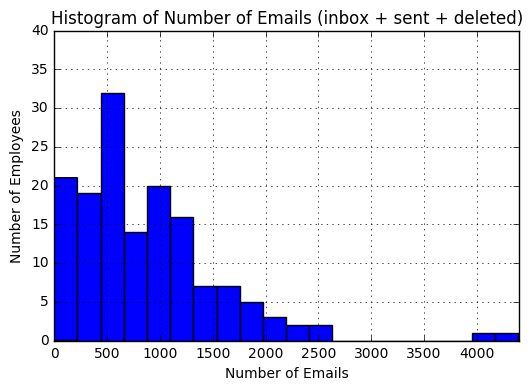

In [7]:
#plot the total number of emails in a histogram

x = [people[i][4] for i in range(len(people))]
n, bins, patches = plt.hist(x, 20, facecolor='blue')
plt.xlabel('Number of Emails')
plt.ylabel('Number of Employees')
plt.title('Histogram of Number of Emails (inbox + sent + deleted)')
plt.axis([0, 4400, 0, 40])
plt.grid(True)

plt.show()

In [8]:
print('People who had over 2000 emails:\n')
for f in people:
    if f[4] > 2000:
        print(f[0])

People who had over 2000 emails:

dasovich-j
kaminski-v
steffes-j
lay-k
shackleton-s
parks-j
nemec-g
presto-k
germany-c


## Analysis \# 2: Number of Unique People Emailed Per Employee

In [21]:
#count how many different people each employee emailed

sentContacts = []
for p in people:
    files = glob('./Data/enron/maildir/' + p[0] + '/sent_items/*')

    temp = []
    
    for file in files:
        if os.access(file, os.R_OK) and not os.path.isdir(file):
            with open(file,'r') as f:
                lines = f.readlines()
                for line in lines:
                    if line.find('To:') >= 0:
                        temp.append(line)
                        break
    sentContacts.append([p[0],len(set(temp))-1])
    

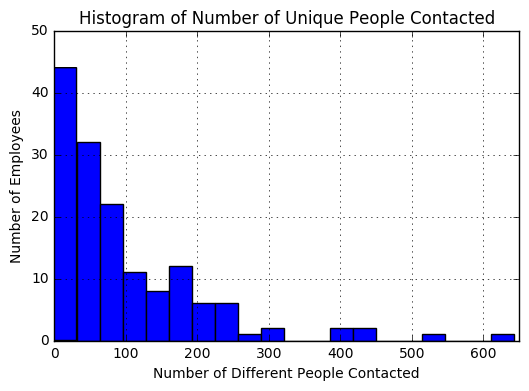

In [23]:
#plot the number of people contacted per employee in a histogram
x = [sentContacts[i][1] for i in range(len(people))]
n, bins, patches = plt.hist(x, 20, facecolor='blue')
plt.xlabel('Number of Different People Contacted')
plt.ylabel('Number of Employees')
plt.title('Histogram of Number of Unique People Contacted')
plt.axis([0, 650, 0, 50])
plt.grid(True)

plt.show()


## Analysis \# 3: Average Number Times Each Person is Contacted

In [12]:
#function to calculate the average of values in a list
def avglist(list):
    if len(list) == 0:
        return 0
    else:
        return (sum(list)/len(list))

In [17]:
#count the average number of times each employee emailed each email address

sentContactsPeople = []
for p in people:
    files = glob('./Data/enron/maildir/' + p[0] + '/sent_items/*')

    peoplecontacted = []
    setpeoplecontacted = []
    
    for file in files:
        if os.access(file, os.R_OK) and not os.path.isdir(file):
            with open(file,'r') as f:
                lines = f.readlines()
                for line in lines:
                    if line.find('To:') >= 0:
                        peoplecontacted.append(line)
                        break
    
    setpeoplecontacted = list(set(peoplecontacted))
    
    if setpeoplecontacted.count('\n') > 0:
        setpeoplecontacted.remove('\n')
    
    temp = [peoplecontacted.count(e) for e in setpeoplecontacted]
    
    
    sentContactsPeople.append([p[0],avglist(temp)])

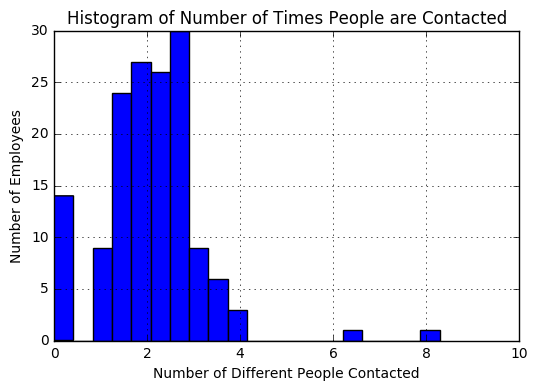

In [25]:
#plot the average number of times each employee emailed each email address in a histogram

x = [sentContactsPeople[i][1] for i in range(len(sentContactsPeople))]
n, bins, patches = plt.hist(x, 20, facecolor='blue')
plt.xlabel('Number of Different People Contacted')
plt.ylabel('Number of Employees')
plt.title('Histogram of Number of Times People are Contacted')
plt.axis([0, 10, 0, 30])
plt.grid(True)

plt.show()

In [26]:
print('The average employee emailed each contact ' + str(avglist(x)) + ' different times.')

The average employee emailed each contact 2.0570945599429264 different times.
